# Deep Learning Basics

## MultiLayer Perceptron/ Feed Forward Architecture
### Implementing a 3 Layer Neural Network  from scratch
<img src="./images/neural_net.gif"
     alt="Perceptron"
     style="width: 450px;" />

#### **Learning Goals**(Theory + Implementation)
- Understand the Multilayer Perpcetron (MLP) Architecture
- Understanding Forward Propagation & Backpropagtion, Loss & Activation Fn's
- Making Predictions
- Checking classification performance on different datasets
- Classification Project 

### Part-1 Implementation Forward Propagation
- Understanding the architecture
- One Layer, Two Layer and Three Layer Networks
- Building a 3 Layer MLP(with 2 hidden layers)
- Writing the code
### Part-2 Implementation Forward Propagation
- How to pass one example? [DONE]
- How to pass multiples examples(Vectorization)?
- Understanding what is softmax?
- Writing the code

# Part -I Neural Architecture



#### **1 Layer Network** 
<img src="./images/Perceptron.png"
     alt="Perceptron"
     style="width: 300px;" />
- Simplest unit Perceptron
- Only one output unit
- No hidden units
- Input is not counted in layers



#### **2 Layer Network** 
<img src="./images/one_white.png"
     alt="Perceptron"
     style="width: 450px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net


#### **3 Layer Network** 
<img src="./images/two_white.png"
     alt="Perceptron"
     style="width: 550px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

 






### Part-3
# Backpropagation Algorithm!
#### Building a Multi-layer neural network for Pokemon Classification from scratch

<img src="./images/pokemon_back.jpg"
     alt="pokemon_back.jpg"
     style="width: 800px;" />


- One of the most difficult/trickiest things in ML to get right
- Why do we need this?

<img src="./images/1-1.gif"
     alt="Perceptron"
     style="width: 550px;" />

- Quite Mathematical, challenging to understand
- **Good Thing** - As a deep learning engineer, you never have to implement backpropagation from scratch.... 
###  but we are going build it from scratch :D !!

In [1]:
import numpy as np

In [2]:
#Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2


In [3]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [4]:
a = np.array([[10,20]])

a_ = softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]]


In [111]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        print("***************")
        print(delta3.shape)
        print(a2.shape)
        dw3 = np.dot(a2.T,delta3)
        print(dw3.shape)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        print(self.activation_outputs)
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
    

In [112]:
def loss(y_oht,p):
    # print(y_oht*np.log(p))
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
    

### Generating Data

In [113]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [114]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [115]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/976606108.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


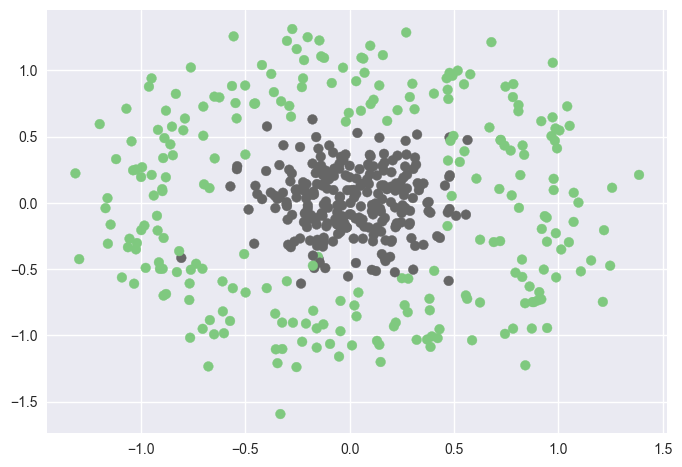

In [116]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [117]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [118]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        # print(Y_OHT.shape)
        # print(type(Y_OHT))
        # print(Y_.shape)
        # print(l.shape)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [119]:
losses = train(X,Y,model,500,0.001)

***************
(500, 2)
(500, 5)
(5, 2)
Epoch 0 Loss 0.3571
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 1 Loss 0.3554
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 2 Loss 0.2593
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 3 Loss 0.2407
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 4 Loss 0.2258
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 5 Loss 0.2132
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 6 Loss 0.2020
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 7 Loss 0.1919
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 8 Loss 0.1827
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 9 Loss 0.1742
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 10 Loss 0.1664
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 11 Loss 0.1593
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 12 Loss 0.1527
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 13 Loss 0.1467
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 14 Loss 0.1411
***************
(500, 2)
(500, 5)
(5, 2)
Epoch 15 Loss 0.1360
***************
(5

In [120]:

# model.summary()
model.model['W1']

array([[ 1.67307896, -0.07045366,  1.17657324,  2.48133275,  2.37909198,
        -0.73355851,  1.01415107,  0.01936095, -0.31827819,  1.5155841 ],
       [ 0.68033397,  1.80300406,  0.81903273, -0.34796106,  0.08098536,
         0.02844177,  1.15462661, -0.06355277,  0.76566561, -1.61925704]])

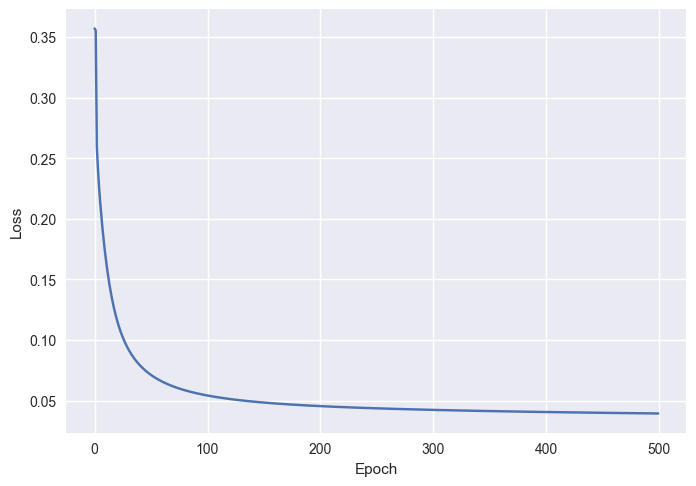

In [121]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [122]:
## Find Accuracy
from visualize import plot_decision_boundary

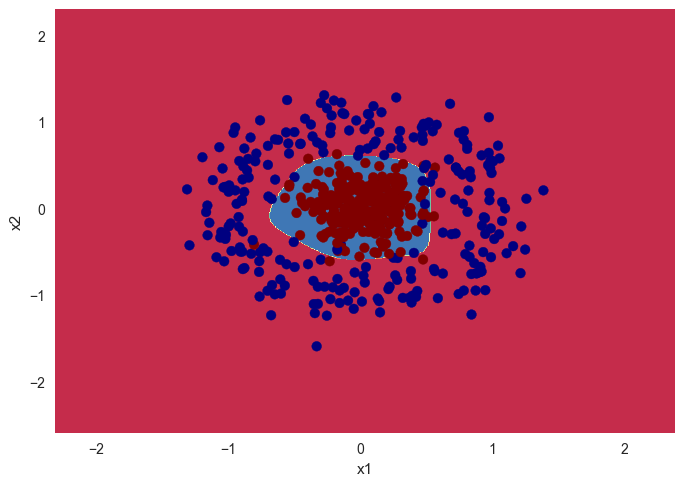

In [123]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [124]:
outputs = model.predict(X)

In [125]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


## Testing on other non-linear datasets

In [185]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

# XOR dataset

In [186]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])

Y = np.array([0,1,1,0])

In [187]:
losses = train(X,Y,model,300,0.1)

***************
(4, 2)
(4, 5)
(5, 2)
Epoch 0 Loss 0.3427
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 1 Loss 0.2543
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 2 Loss 0.2126
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 3 Loss 0.1926
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 4 Loss 0.1778
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 5 Loss 0.1639
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 6 Loss 0.1493
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 7 Loss 0.1346
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 8 Loss 0.1207
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 9 Loss 0.1089
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 10 Loss 0.1008
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 11 Loss 0.1004
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 12 Loss 0.1244
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 13 Loss 0.1949
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 14 Loss 0.3900
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 15 Loss 0.1355
***************
(4, 2)
(4, 5)
(5, 2)
Epoch 16 Loss 0.0958
***************
(4, 2)
(

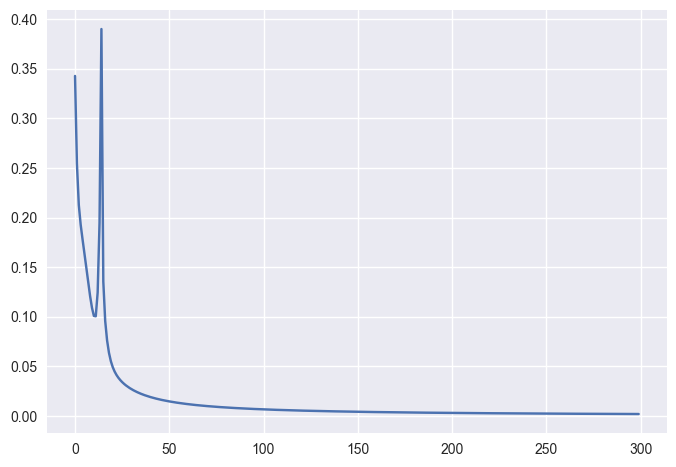

In [188]:
plt.plot(losses)

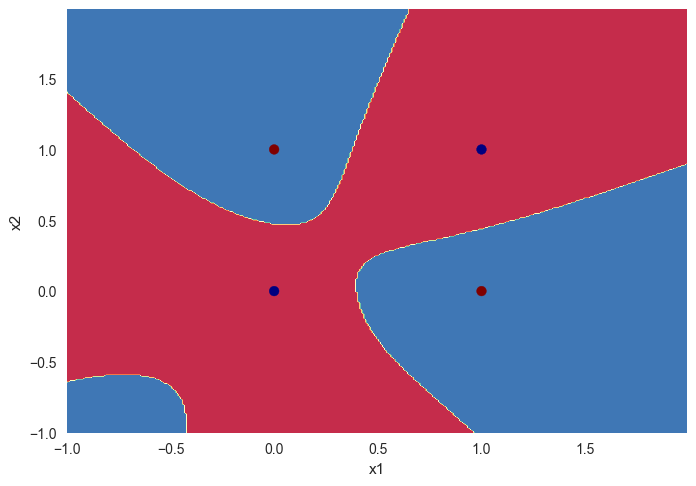

In [130]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## Other Datasets

In [131]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [132]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
***************
(4, 2)
(4, 3)
(3, 2)
*

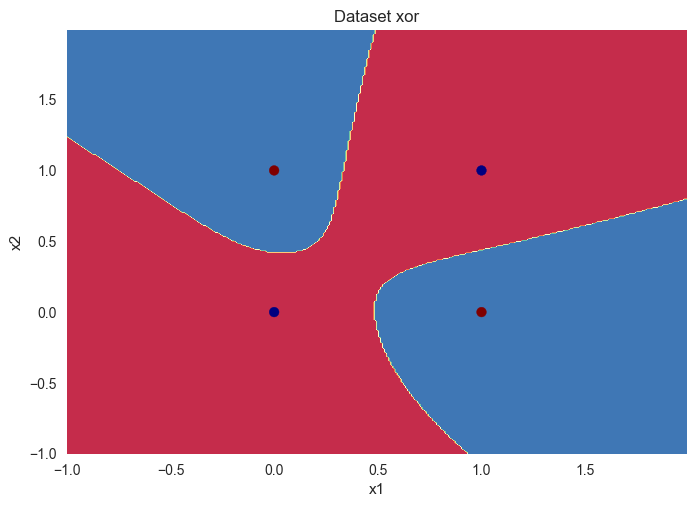

***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************


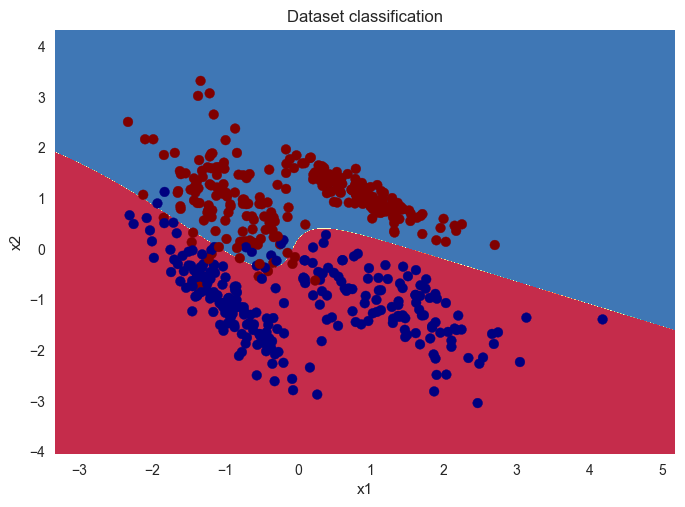

***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************


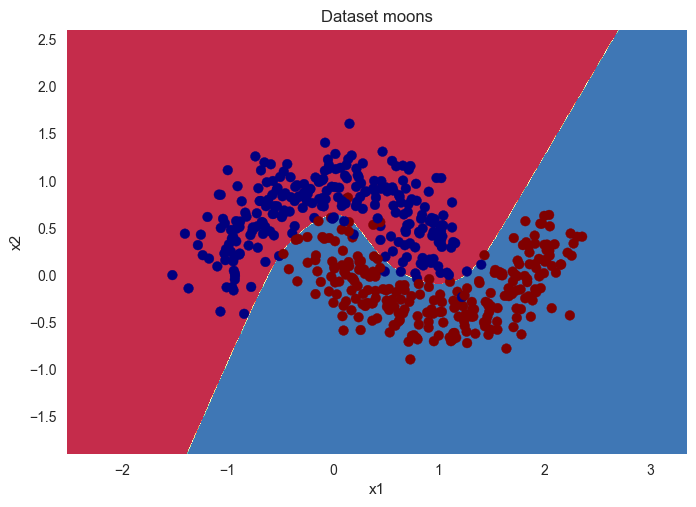

***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************
(500, 2)
(500, 3)
(3, 2)
***************


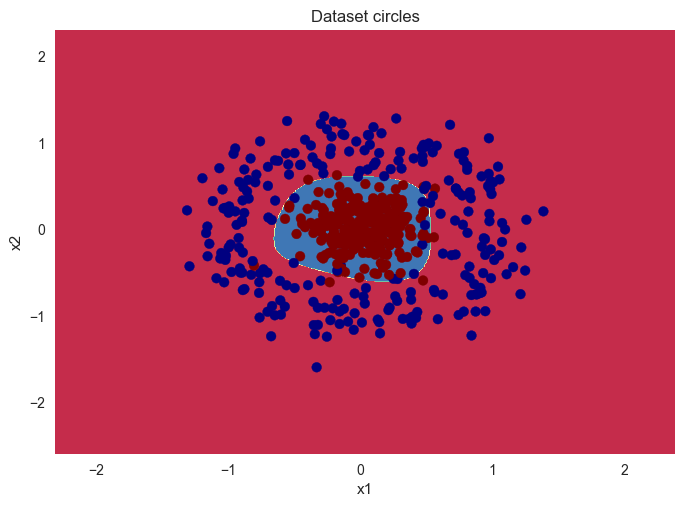

In [133]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y  = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Acc %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()
    
    

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/3174288812.py:2: RuntimeWarning: overflow encountered in exp
  sig_z = 1/(1 + np.exp(-(400*z + 24)))


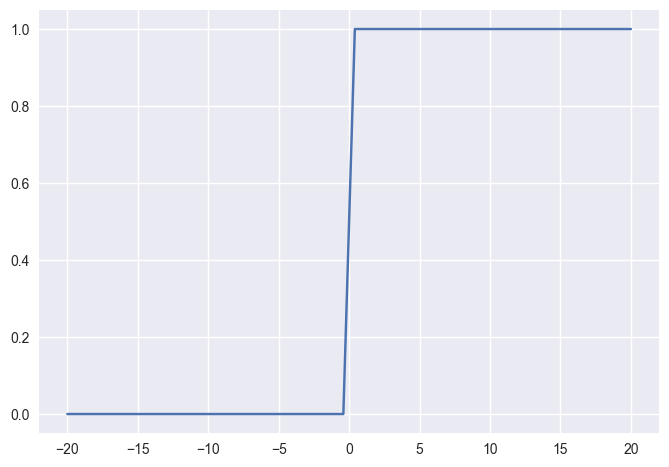

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/3174288812.py:7: RuntimeWarning: overflow encountered in exp
  sig_z = 1/(1 + np.exp(-(400*z + 424)))


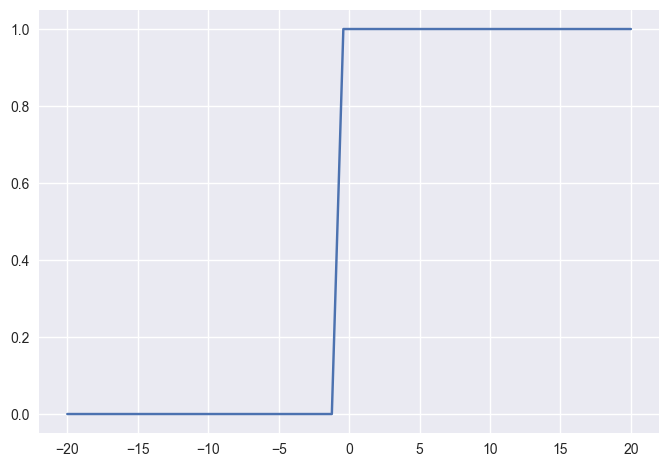

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/3174288812.py:12: RuntimeWarning: overflow encountered in exp
  sig_z = 1/(1 + np.exp(-(400*z + 424*2)))


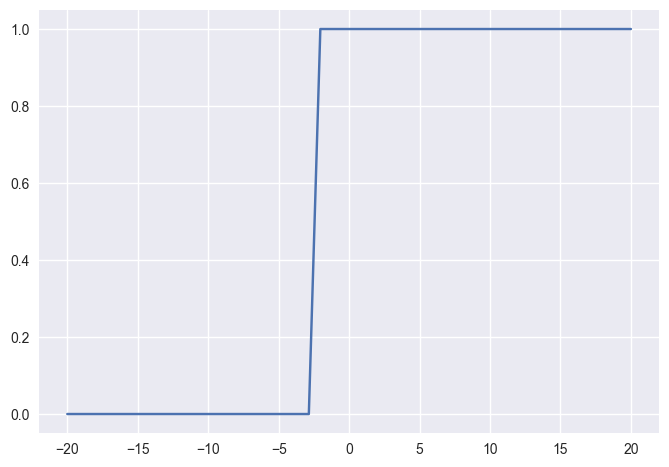

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/3174288812.py:17: RuntimeWarning: overflow encountered in exp
  sig_z = 1/(1 + np.exp(-(400*z + 424*5)))


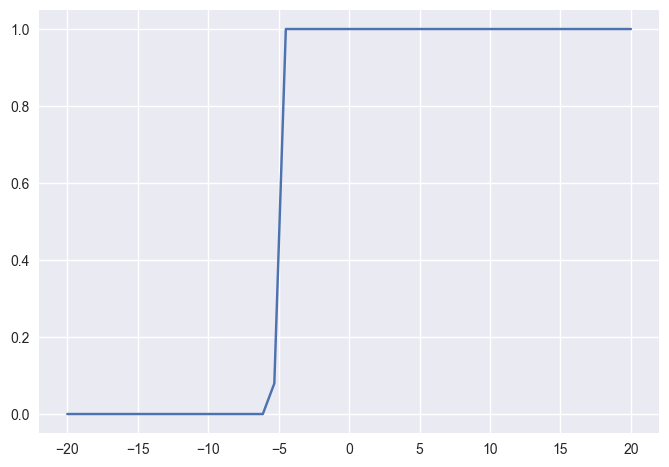

/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_65330/3174288812.py:22: RuntimeWarning: overflow encountered in exp
  sig_z = 1/(1 + np.exp(-(400*z - 424*5)))


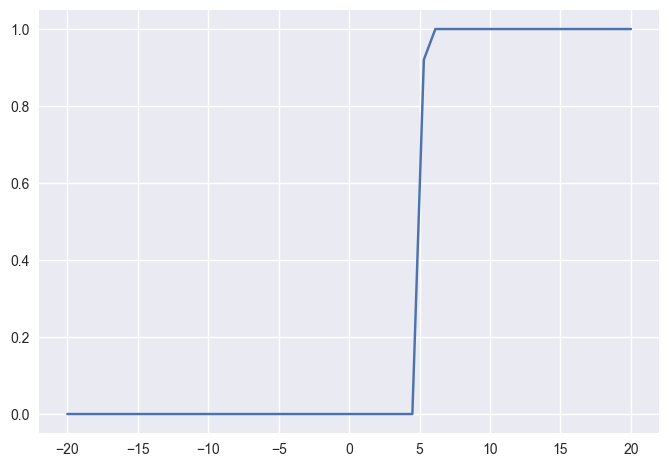

In [145]:

z = np.linspace(-20, 20)
sig_z = 1/(1 + np.exp(-(400*z + 24)))

plt.plot(z, sig_z)
plt.show()

sig_z = 1/(1 + np.exp(-(400*z + 424)))

plt.plot(z, sig_z)
plt.show()

sig_z = 1/(1 + np.exp(-(400*z + 424*2)))

plt.plot(z, sig_z)
plt.show()

sig_z = 1/(1 + np.exp(-(400*z + 424*5)))

plt.plot(z, sig_z)
plt.show()

sig_z = 1/(1 + np.exp(-(400*z - 424*5)))

plt.plot(z, sig_z)
plt.show()

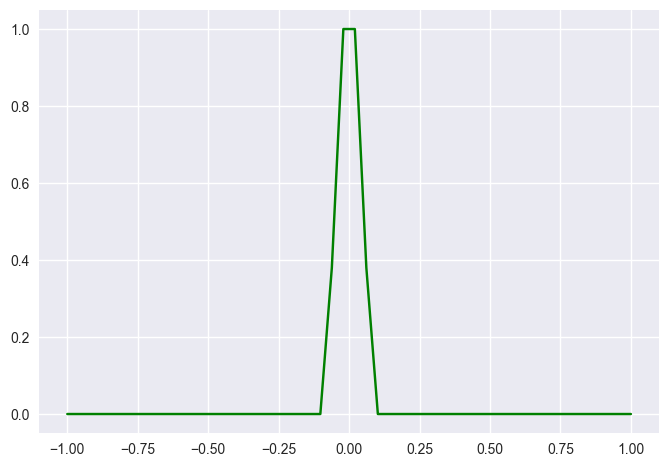

In [154]:
x = np.linspace(-1, 1)
h11_x = 1/(1 + np.exp(-(400 * x + 24)))
h12_x = 1/(1+np.exp(-(400 * x - 24)))
h21x = h11_x - h12_x
# plt.plot(x, h11_x, color='red')
# plt.plot(x, h12_x, color='blue')
plt.plot(x, h21x, color='green')
plt.show()

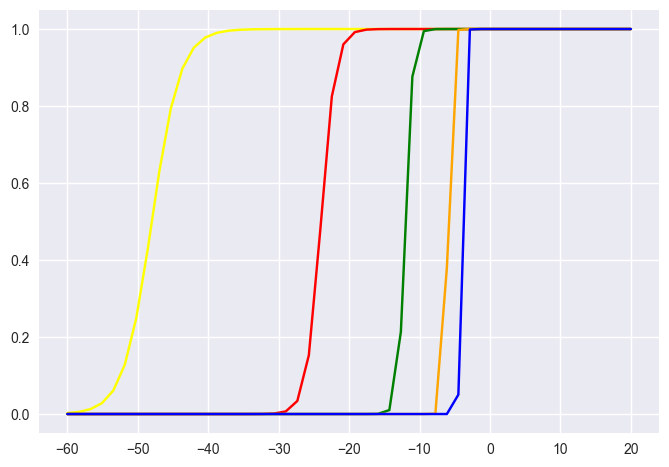

In [175]:
x = np.linspace(-60, 20)
h11_x = 1/(1 + np.exp(-(0.5 * x + 24)))
plt.plot(x, h11_x, color='yellow')
h11_x = 1/(1 + np.exp(-(x + 24)))
plt.plot(x, h11_x, color='red')
h11_x = 1/(1 + np.exp(-(2 * x + 24)))
plt.plot(x, h11_x, color='green')
h11_x = 1/(1 + np.exp(-(4 * x + 24)))
plt.plot(x, h11_x, color='orange')
h11_x = 1/(1 + np.exp(-(6 * x + 24)))
plt.plot(x, h11_x, color='blue')
plt.show()
# slope decreases by W increase ?

In [208]:
class NeuralNetwork_XNOR:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second/Output Layer
        model['W2'] = np.random.randn(layers[0],output_size)
        model['b2'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2 = self.model['W1'],self.model['W2']
        b1, b2 = self.model['b1'],self.model['b2']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        y_ = softmax(z2)
        
        self.activation_outputs = (a1,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2 = self.model['W1'],self.model['W2']
        b1, b2 = self.model['b1'],self.model['b2']
        m = x.shape[0]
        
        a1,y_ = self.activation_outputs
        
        delta2 = y_ - y
        print("***************")
        print(delta2.shape)
        print(a1.shape)
        dw2 = np.dot(a1.T,delta2)
        print(dw2.shape)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2']
        print(self.activation_outputs)
        a1,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("Y_ ",y_.shape)


***************
(4, 2)
(4, 10)
(10, 2)
Epoch 0 Loss 0.5711
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 1 Loss 0.7199
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 2 Loss 0.9192
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 3 Loss 0.3578
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 4 Loss 0.3394
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 5 Loss 0.2852
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 6 Loss 0.2817
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 7 Loss 0.2485
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 8 Loss 0.2418
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 9 Loss 0.2194
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 10 Loss 0.2105
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 11 Loss 0.1911
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 12 Loss 0.1760
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 13 Loss 0.1515
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 14 Loss 0.1251
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 15 Loss 0.0951
***************
(4, 2)
(4, 10)
(10, 2)
Epoch 16 Lo

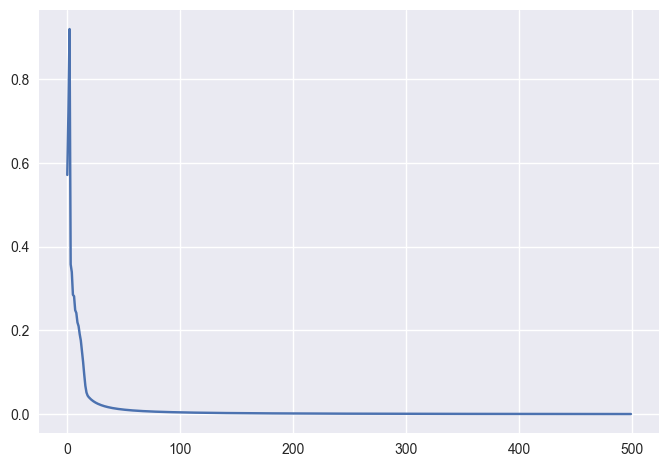

{'W1': array([[ 3.16484166e+00,  1.62715728e+00,  2.35688374e+00,
          2.30140111e+00,  1.79400720e+00, -1.01440632e+00,
          1.90866029e+00, -1.40535629e-01, -2.08186927e-01,
          1.59088188e+00],
        [-2.18477973e+00,  1.72043489e+00,  2.13019550e+00,
         -4.14996324e-01, -3.07631975e-03,  1.70184161e+00,
          1.87298029e+00, -2.59972460e-01,  1.25628063e+00,
         -2.88284861e+00]]),
 'b1': array([[ 0.85990083, -0.04397193, -0.44068949, -0.46428309, -0.58198398,
          0.3786435 , -0.22940855,  0.23126359, -0.30976764, -0.41504685]]),
 'W2': array([[-3.88269603,  1.98332481],
        [ 1.07262082, -0.95034964],
        [ 2.62808507, -1.81269612],
        [-0.78850251,  0.64707717],
        [ 1.07382409,  1.9283139 ],
        [-0.79390688,  1.32701683],
        [-0.2435562 , -2.62502601],
        [ 0.14180746, -0.33337064],
        [ 0.36904952,  2.06362101],
        [ 2.11948448, -2.80911405]]),
 'b2': array([[-0.02860098,  0.02860098]])}

In [216]:
xnor_model  = NeuralNetwork_XNOR(input_size=2,layers=[10],output_size=2)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]
             ])

Y = np.array([1,0,0,1])
losses = train(X,Y,xnor_model,500,0.3)
plt.plot(losses)
plt.show()
xnor_model.model

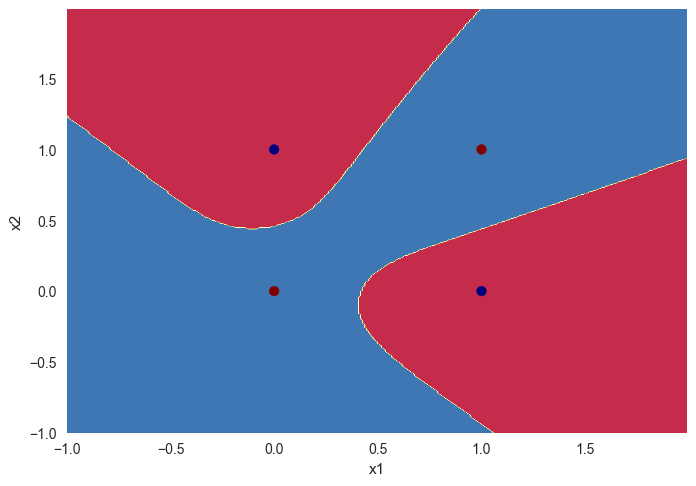

In [217]:
plot_decision_boundary(lambda x:xnor_model.predict(x),X,Y)